![Title](Images/cisco.png)

# Lab - Simple Linear Regression in Python 

### Objectives
In this lab, you will become familiar with the concepts of simple linear regression and working with the provided data to make a prediction. 

**Part 1: Import the Libraries and Data  **

**Part 2: Plot the Data **

**Part 3: Perform Simple Linear Regression **

### Scenario / Background
In statistics, linear regression is a way to model a relationship between dependent variable $y$ and independent variable $x$.

In this lab, you will analyze district sales data and perform a simple linear regression to predict annual net sales based on the number of stores in the district.
### Required Resources
* 1 PC with Internet access
* Python libraries: `pandas`, `numpy`, `scipy`, and `matplotlib`
* Datafiles: stores-dist.csv

## Part 1: Import the Libraries and Data

In this part, you will import the libraries and the data from the file `stores-dist.csv`.

#### Step 1: Import the libraries.

In this step, you will import the following libraries:

* `matplotlib.pyplot` as plt
* `numpy` as np
* `pandas` as pd

In [1]:
# Code Cell 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step 2: Import the data.

In this step, you will import the data from the file `stores-dist.csv` and verify that the file was imported correctly.

In [2]:
# Code Cell 2

# Import the file, stores-dist.csv
salesDist = pd.read_csv('./Data/stores-dist.csv')

# Verify the imported data
salesDist.head()

,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


The column headings, `annual net sales` and `number of stores in district` are renamed to make it easier during data processing.

* `annual net sales` to sales
* `number of stores in district` to stores

In [3]:
# Code Cell 3
# The district column has no relevance at this time, so it can be dropped.
salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})
salesDist.head()

,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


## Part 2: Plot the Data

### Step 1: Determine the correlation.

In this step, you will investigate the correlation of the data prior to regression analysis. You will also drop any unrelated columns as necessary. 

In [4]:
# Code Cell 4
# Check correlation of data prior to doing the analysis
# # Hint: check lab 3.1.5.5
salesDist.corr()

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


From the correlation coefficent, it appears that the column `district` has low correlation to the `annual net sales` and `number of stores in the district`. So the district column is not necessary as part of the regression analysis. The  `district` column can be dropped from the dataframe.

In [5]:
# Code Cell 5
# The district column has no relevance at this time, so it can be dropped.
sales = salesDist.drop(columns=['district'])

sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


From the correlation coefficent data, what type of correlation did you observe between annual net sales and number of stores in the district?

Based on the correlation coefficient data, we observe a **positive correlation** between annual net sales and the number of stores in the district.

### Step 2: Create the plot.

In this step, you will create a plot to visualize the data. You will also assign stores as the independent variable $x$ and sales as the dependent variable $y$.

In [6]:
# Code Cell 6
# dependent variable for y axis
y = sales['sales']
# independent variable for x axis
x = sales.stores

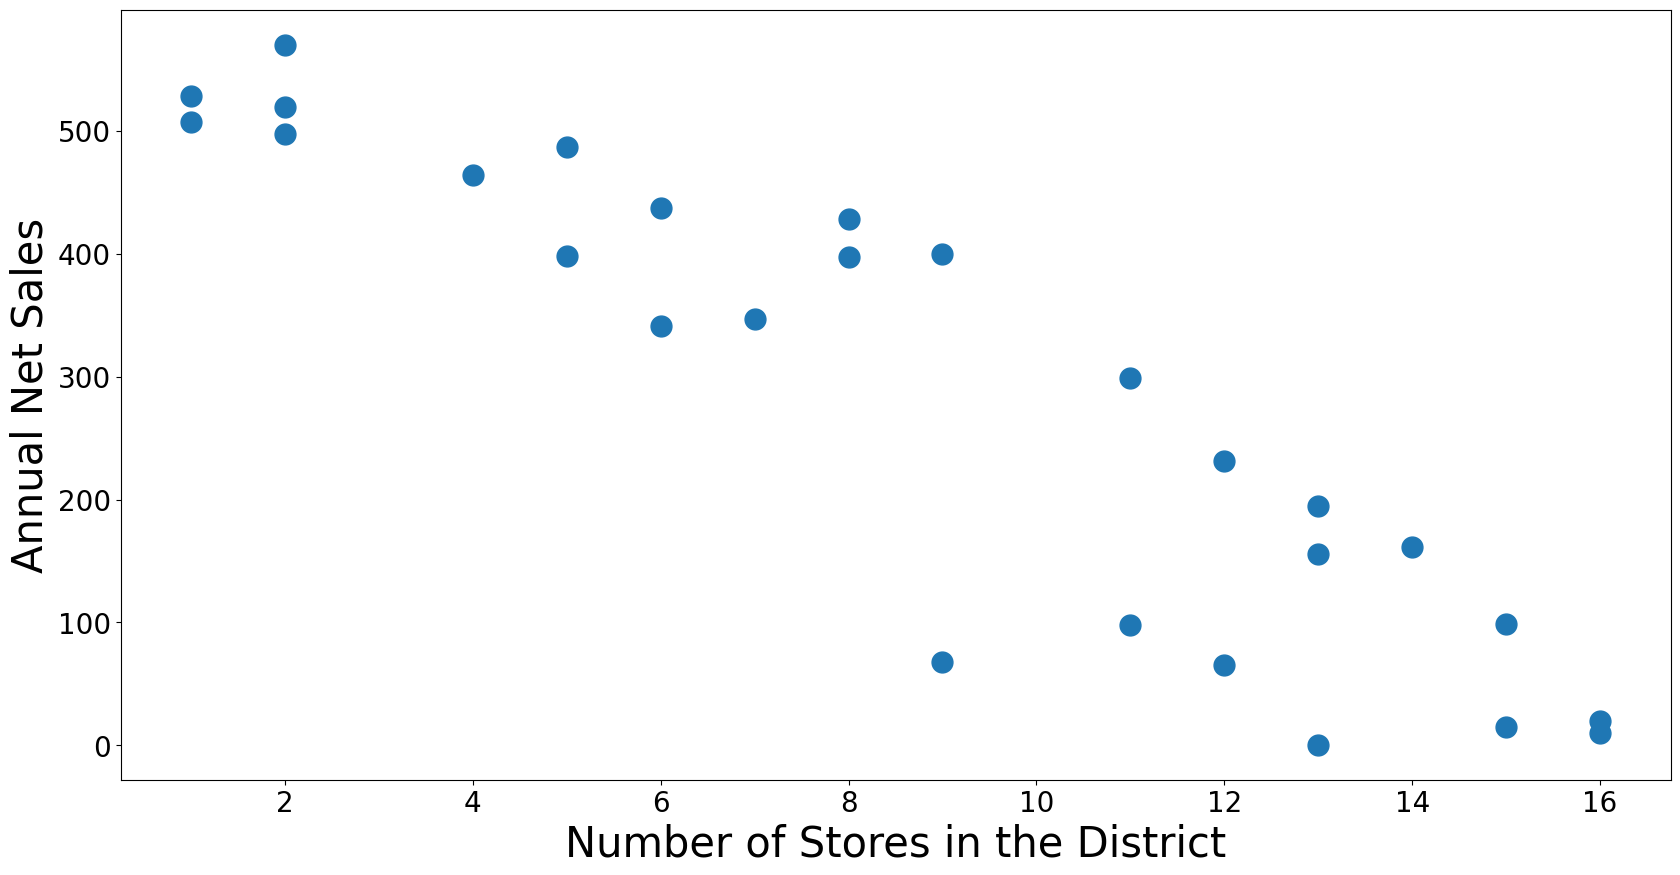

In [7]:
# Code Cell 7
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in the District', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

## Part 3: Perform Simple Linear Regression

In this part, you will use numpy to generate a regression line for the analyzed data. You will also calculate the centroid for this dataset. The centrod is the mean for the dataset. The generated simple linear regression line must also pass through the centroid.

### Step 1: Calculate the slope and y-intercept of the linear regression line.

In [8]:
# Code Cell 8
# Use numpy polyfit for linear regression to fit the data
# Generate the slope of the line (m)
# Generate the y-intercept (b)
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is -35.79.
The y-intercept is 599.38.
The best fit simple linear regression line is -35.79x + 599.38.


### Step 2: Calculate the centroid.

The centroid of the dataset is calculated by using the mean function.

In [9]:
# Code Cell 9
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 8.74 and y = 286.57.


### Step 3: Overlay the regression line and the centroid point on the plot.

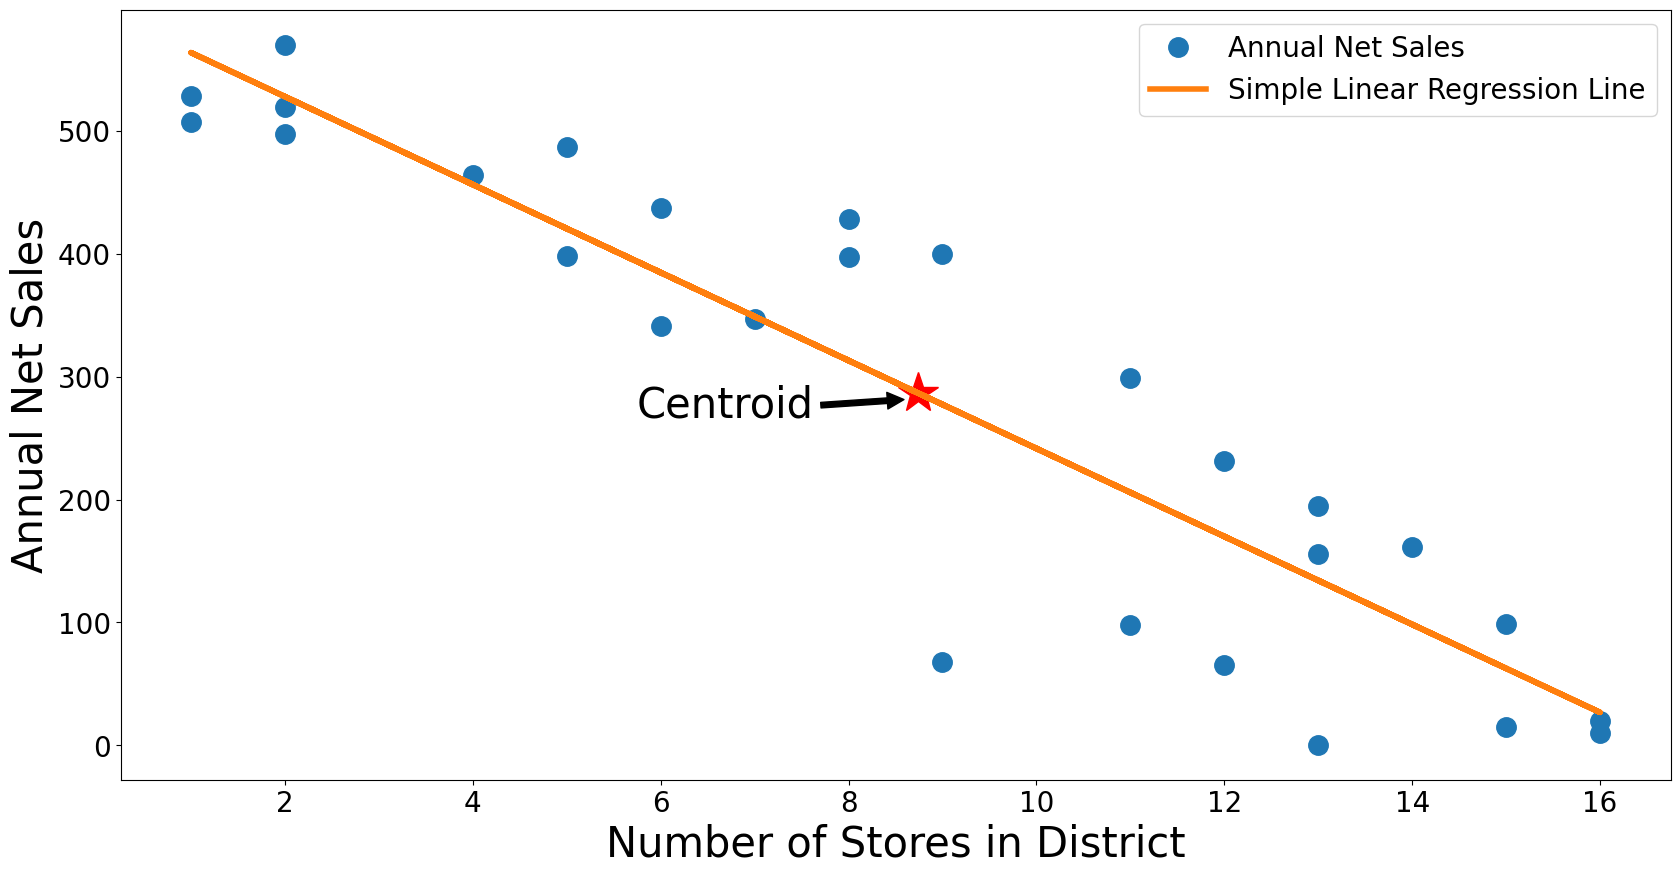

In [10]:
# Code Cell 10
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "Annual Net Sales") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in District', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

### Step 4: Prediction

Using the linear regression line, you can predict the annual net sales based on the number of stores in the district.

In [11]:
# Code Cell 11
# Function to predict the net sales from the regression line
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")

In [13]:
# Code Cell 12
# Enter the number of stores in the function to generate the net sales prediction.
predict(4)

456.2313681207653

What is the predicted net sales if there are 4 stores in the district?

**456.231**

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>